## 住宅価格の予測タスク

### データの準備

In [18]:
import numpy
from sklearn.datasets import load_boston
from pandas import DataFrame
from sklearn.model_selection import train_test_split

boston = load_boston()

print(boston['DESCR'])
X = boston.data
y = boston.target

feature_names = boston.feature_names

df = DataFrame(data=X, columns=feature_names)
display(df.head())
df['MEDV'] = y

# 不要なカラムの削除
df.drop(columns=['CHAS', 'NOX', 'B'], inplace=True)

display(df.head())

display(df.describe())

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## 散布図

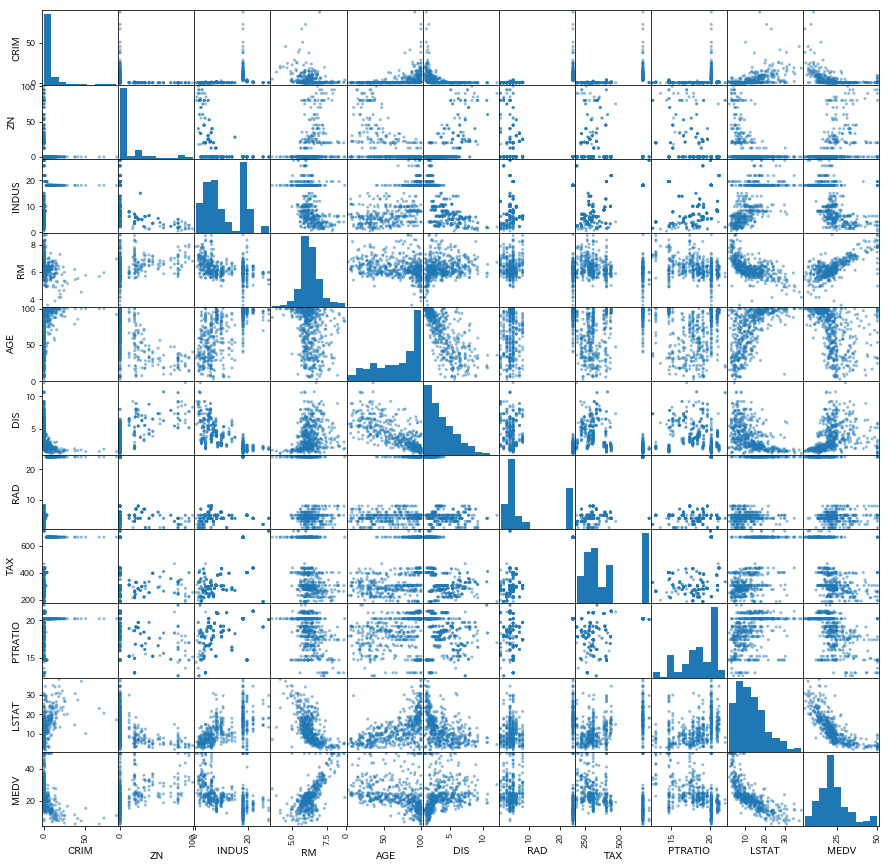

In [19]:
from matplotlib import pyplot
import japanize_matplotlib
from pandas.plotting import scatter_matrix

# 散布図の描画
axes = scatter_matrix(df, figsize=(15,15))

In [22]:
# 上の図を見るとRM、LSTATが線形に見える
X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 単回帰の為2つの特徴量を別の変数に代入する
X_train0 = X_train[:, 0].reshape(-1, 1)# 訓練データのRM
X_train1 = X_train[:, 1].reshape(-1, 1)# 訓練データのLSTAT
X_test0 = X_test[:, 0].reshape(-1, 1)# テストデータのRM
X_test1 = X_test[:, 1].reshape(-1, 1)# テストデータのLSTAT
# .reshapeで1行の配列にする必要がある

### 単回帰

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# RMは標準化を行う
standard_scaler = StandardScaler()
X_train_scaled0 = standard_scaler.fit_transform(X_train0)
X_test_scaled0 = standard_scaler.transform(X_test0)

# LSTSTは正規化を行う
min_max_scaler = MinMaxScaler()
X_train_scaled1 = min_max_scaler.fit_transform(X_train1)
X_test_scaled1 = min_max_scaler.transform(X_test1)

In [29]:
# X_trainのスケーリングを行う

# X_train と同じ形状の配列を作る
X_train_scaled = numpy.zeros(X_train.shape)
# 1列目にスケール済みのRMを代入する
X_train_scaled[:, 0] = X_train_scaled0.reshape(-1)
# 2列目にスケール済みのLSTATを代入する
X_train_scaled[:, 1] = X_train_scaled1.reshape(-1)
# 確認
print(X_train_scaled[:5])

[[ 0.14526384  0.09602649]
 [-0.20840082  0.28449227]
 [-0.89623682  0.23399558]
 [-0.54396454  0.13383002]
 [-0.55649596  0.45253863]]


In [31]:
# X_test をスケーリングします。

# X_test と同じ形状の配列を作る
X_test_scaled = numpy.zeros(X_test.shape)
# 1列目にスケール済みの RM を代入する
X_test_scaled[:, 0] = X_test_scaled0.reshape(-1)
# 2列目にスケール済みの LSTAT を代入する
X_test_scaled[:, 1] = X_test_scaled1.reshape(-1)
# 確認
print(X_test_scaled[:5])

[[ 0.12577051  0.20171082]
 [ 0.60196466  0.04966887]
 [-0.47713027  0.450883  ]
 [-0.36295507  0.10458057]
 [-0.03992278  0.42880795]]


### 単回帰

In [38]:
# scikit-learn ライブラリから SGDRegressor を importクラスタリングの場合はSGDClassifier
from sklearn.linear_model import SGDRegressor

reg0 = SGDRegressor(loss='squared_loss', max_iter=1000, tol=1e-3, penalty='none', random_state=42)
reg1 = SGDRegressor(loss='squared_loss', max_iter=1000, tol=1e-3, penalty='none', random_state=42)
'''
SGDRegressor のインスタンスを作成。
loss=squqred_loss はコスト関数として二乗誤差を利用
max_iter=1000 は重みの最大更新回数を1000回
tol=1e-3 はコスト関数の減少が 0.001 以下になったら学習を止める
penalty='none' は正則化をどうするかというパラメータここでは無効化
'''

"\nSGDRegressor のインスタンスを作成。\nloss=squqred_loss はコスト関数として二乗誤差を利用\nmax_iter=1000 は重みの最大更新回数を1000回\ntol=1e-3 はコスト関数の減少が 0.001 以下になったら学習を止める\npenalty='none' は正則化をどうするかというパラメータここでは無効化\n"

In [40]:
# 標準化RMをfit
reg0.fit(X_train_scaled0, y_train)
# 正規化LSTSTをfit
reg1.fit(X_train_scaled1, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='none', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

### 決定係数R2を計算
- 1に近いほどいいモデル

In [42]:
print('標準化したRMのR2スコア(訓練データ)', reg0.score(X_train_scaled0, y_train))
print('標準化したRMのR2スコア(テストデータ)', reg0.score(X_test_scaled0, y_test))
print('正則化したLSTSTのR2スコア(訓練データ)', reg1.score(X_train_scaled1, y_train))
print('正則化したLSTSTのR2スコア(テストデータ)', reg1.score(X_test_scaled1, y_test))

標準化したRMのR2スコア(訓練データ) 0.48788214501838045
標準化したRMのR2スコア(テストデータ) 0.4582922711258371
正則化したLSTSTのR2スコア(訓練データ) 0.5568885061492568
正則化したLSTSTのR2スコア(テストデータ) 0.49510611450093317


### 予測値のプロット

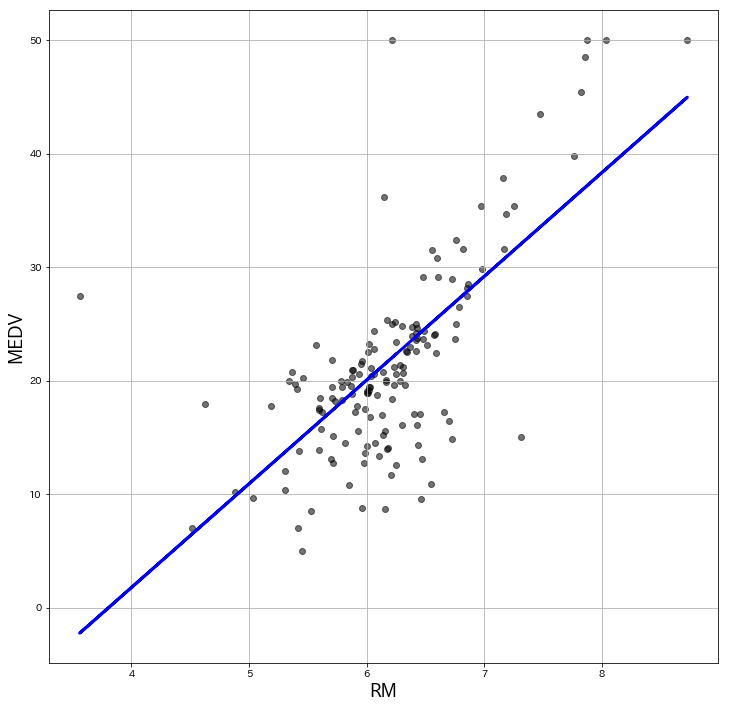

In [45]:
# テストデータの予測
y_pred = reg0.predict(X_test_scaled0)

fig = pyplot.figure(figsize=(12, 12))

# テストデータのプロット（散布図）
pyplot.scatter(X_test0, y_test, color='black', alpha=0.55)
# 予測値のプロット（直線）
pyplot.plot(X_test0, y_pred, linewidth=3, color='blue')

pyplot.xlabel('RM', fontsize=18)
pyplot.ylabel('MEDV', fontsize=18)

pyplot.grid()
pyplot.show()

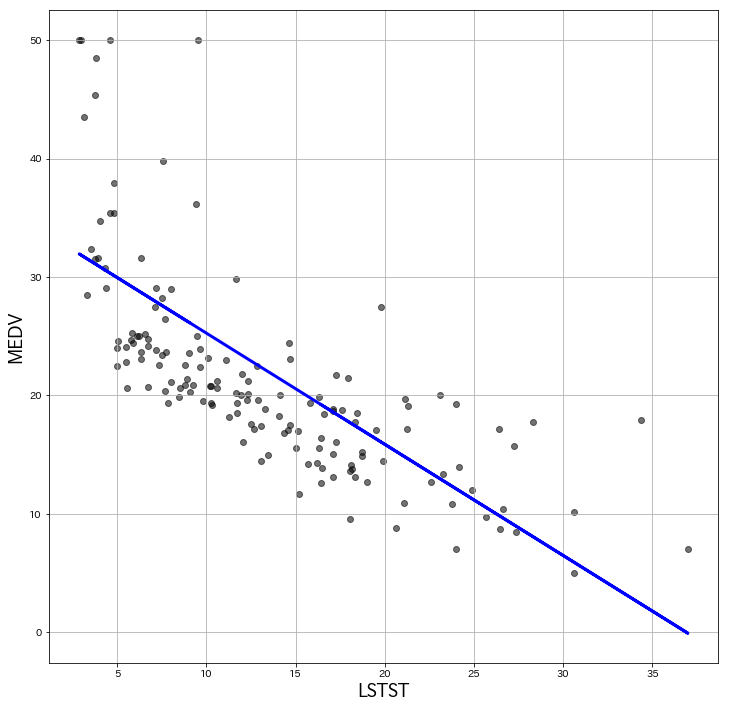

In [46]:
# テストデータの予測
y_pred = reg1.predict(X_test_scaled1)

fig = pyplot.figure(figsize=(12, 12))

# テストデータのプロット（散布図）
pyplot.scatter(X_test1, y_test, color='black', alpha=0.55)
# 予測値のプロット（直線）
pyplot.plot(X_test1, y_pred, linewidth=3, color='blue')

pyplot.xlabel('LSTST', fontsize=18)
pyplot.ylabel('MEDV', fontsize=18)

pyplot.grid()
pyplot.show()